<a href="https://colab.research.google.com/github/SrijaaimeenakshiM/Skimlit-project/blob/main/skimlit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.15.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [ ]:
!ls /content/pubmed-rct

PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
#check what files are in the PubMed_20k dataset

!ls /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
data_dir="/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [ ]:
#Check all of the filenames in the target directory
import os
filenames=[data_dir+"/"+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
#preprocess data
#Create a function that reads the file and return the lines of string as a list
def get_lines(filename):
  with open(filename,"r") as f:
    return f.readlines()

In [ ]:
train_lines=get_lines(data_dir+"/"+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
def preprocess_text_with_line_numbers(filename):
  data_list=get_lines(filename)
  abstract_lines=""
  samples=[]


  for line in data_list:
    if line.startswith("###"):
      abstract_id=line
      abstract_lines=""
    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()
      for linenumber,abstract_line in enumerate(abstract_line_split):
        line_data={}
        target_split=abstract_line.split("\t")
        line_data["target"]=target_split[0]
        line_data["text"]=target_split[1].lower()
        line_data["line_number"]=linenumber
        line_data["total_lines"]=len(abstract_line_split)-1
        samples.append(line_data)
    else:
      abstract_lines+=line
  return samples

In [ ]:
train_samples=preprocess_text_with_line_numbers(data_dir+"/"+"train.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"/"+"test.txt")
val_samples=preprocess_text_with_line_numbers(data_dir+"/"+"dev.txt")

In [ ]:
train_samples[:12]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
test_df=pd.DataFrame(test_samples)
val_df=pd.DataFrame(val_samples)

In [ ]:
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [ ]:
train_df["target"].value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


<Axes: ylabel='Frequency'>

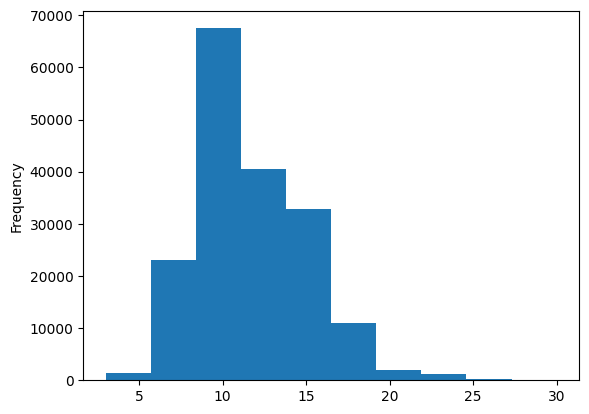

In [ ]:
#length of the lines
train_df["total_lines"].plot.hist()

#Get list of sentences

In [ ]:
Xtrain=train_df["text"].tolist()
Xtest=test_df["text"].tolist()
Xval=val_df["text"].tolist()

In [ ]:
len(Xtrain),len(Xtest),len(Xval)

(180040, 30135, 30212)


#Make numerical labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)#because tensorflow does nt accept sparse matrix

train_labels=encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
test_labels=encoder.fit_transform(test_df["target"].to_numpy().reshape(-1,1))
val_labels=encoder.fit_transform(val_df["target"].to_numpy().reshape(-1,1))
train_labels



array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
#using label encoded
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
ytrain=encoder.fit_transform(train_df["target"].to_numpy())
ytest=encoder.fit_transform(test_df["target"].to_numpy())
yval=encoder.fit_transform(val_df["target"].to_numpy())

In [ ]:
ytrain

array([3, 2, 2, ..., 4, 1, 1])

#Model 0(Naive_bayes)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(Xtrain,ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(Xval,yval)

0.7218323844829869

In [ ]:
baseline_preds=model_0.predict(Xval)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-02-04 13:19:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-02-04 13:19:10 (92.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results=calculate_results(yval,baseline_preds)

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
#how long a each sentence and its average of all the sentence in Xtrain
sent_len=[len(line.split()) for line in Xtrain]
sent_len[:5]

[49, 27, 15, 14, 35]

In [ ]:
import numpy as np
avg_sent_len=np.mean(sent_len)
avg_sent_len

26.338269273494777

In [ ]:
max(sent_len)# in sent_len the maximum value is 296

296

##Create text vectorizer and embedding

In [ ]:
output_seq_len=int(np.percentile(sent_len,95))#95 per of sentences have 55 words
output_seq_len

55

In [ ]:
max_tokens=68000

In [ ]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer=TextVectorization(max_tokens=max_tokens,
                                  output_sequence_length=output_seq_len)#if a sentence has words more than 55 it will put 0 for remaining letters


In [ ]:
text_vectorizer.adapt(Xtrain)

In [ ]:
import random
target_sentence =random.choice(Xtrain)
print(f"Text:{target_sentence}")
print(f"Vectorized_text:{text_vectorizer([target_sentence])}")

Text:the intervention group underwent psychological intervention and listening to music for @ min before surgery .
Vectorized_text:[[   2   38   13  352  806   38    3 6176    6 2183   11  242  129  115
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [ ]:
words_in_vocab=text_vectorizer.get_vocabulary()
print(len(words_in_vocab))

64841


In [ ]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
from tensorflow.keras import layers
embedding=layers.Embedding(input_dim=len(words_in_vocab),
                           output_dim=128,#always divisible by 8
                           mask_zero=True,
                           name="token_embedding")

In [ ]:
import random
target_sentence =random.choice(Xtrain)
print(f"Text:{target_sentence}\n")
print(f"Vectorized_text:{text_vectorizer([target_sentence])}\n")
vectorizer_text=text_vectorizer([target_sentence])
print(f"Embedded text:{embedding(vectorizer_text)}\n")
embedding(vectorizer_text).shape

Text:we enrolled patients in @ centres in switzerland , germany and serbia .

Vectorized_text:[[   43   230    12     5  1498     5  5787  3098     3 21793     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Embedded text:[[[ 0.01349862 -0.03238408 -0.00851846 ...  0.03327601 -0.02987692
   -0.02624674]
  [ 0.04898976 -0.00381381  0.02362027 ... -0.03662362  0.00912673
    0.03137232]
  [ 0.03701996 -0.02214923 -0.0392073  ... -0.02614501  0.01369009
    0.04004126]
  ...
  [-0.02716836  0.03397316 -0.01658645 ... -0.02101116  0.02389959
   -0.02737225]
  [-0.02716836  0.03397316 -0.01658645 ... -0.02101116  0.02389959
   -0.02737225]
  [-0.02716836  0.03397316 -0.01658645 ... -0.02101116  0.02389959
   -0.02737225]]]



TensorShape([1, 55, 128])

In [ ]:


# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, train_labels))
valid_dataset = tf.data.Dataset.from_tensor_slices((Xval, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((Xtest, test_labels))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:


# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
import numpy as np

num_classes = len(np.unique(ytrain))
num_classes

5

#Model_1

In [ ]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = embedding(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches


Epoch 1/3
562/562 [==============================] - 63s 111ms/step - loss: 0.9178 - accuracy: 0.6365 - val_loss: 0.6837 - val_accuracy: 0.7370
Epoch 2/3
562/562 [==============================] - 67s 119ms/step - loss: 0.6566 - accuracy: 0.7576 - val_loss: 0.6331 - val_accuracy: 0.7703
Epoch 3/3
562/562 [==============================] - 64s 113ms/step - loss: 0.6180 - accuracy: 0.7744 - val_loss: 0.5986 - val_accuracy: 0.7852


In [ ]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 4s 5ms/step - loss: 0.6001 - accuracy: 0.7866


[0.6000940799713135, 0.7865749001502991]

In [ ]:
model_1_pred=model_1.predict(valid_dataset)

945/945 [==============================] - 6s 6ms/step


In [ ]:
model_1_pred,model_1_pred.shape

(array([[4.53506321e-01, 1.57175884e-01, 5.66455983e-02, 3.10633391e-01,
         2.20386423e-02],
        [4.38184112e-01, 2.77799785e-01, 1.20687867e-02, 2.65115917e-01,
         6.83151791e-03],
        [1.24423288e-01, 6.52918871e-03, 1.32590020e-03, 8.67703855e-01,
         1.76614030e-05],
        ...,
        [8.43224370e-06, 7.11085333e-04, 7.45933794e-04, 4.84629527e-06,
         9.98529673e-01],
        [5.07901348e-02, 3.86877239e-01, 1.24014385e-01, 5.67314439e-02,
         3.81586790e-01],
        [1.47210389e-01, 7.12945223e-01, 3.33614014e-02, 4.37973142e-02,
         6.26856759e-02]], dtype=float32),
 (30212, 5))

In [ ]:
model_1_preds=tf.argmax(model_1_pred,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_1_results=calculate_results(yval,model_1_preds)
model_1_results

{'accuracy': 78.65748709122204,
 'precision': 0.7837373064186566,
 'recall': 0.7865748709122203,
 'f1': 0.7842898567048471}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

#Model_2

In [ ]:
import tensorflow_hub as hub
embedding_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",

                             dtype=tf.string,
                             trainable=False,
                             name="USE")

In [ ]:
random_training_sentence=random.choice(Xtrain)
print(f"embedded sentence:\n{embedding_layer([random_training_sentence])}")

embedded sentence:
[[-3.13293897e-02  2.10930128e-03 -1.48908049e-02 -3.26507054e-02
  -5.34505621e-02  5.82173206e-02  3.91890332e-02 -6.13971762e-02
   5.39519899e-02 -2.59698741e-03  7.11356103e-02  1.49908522e-02
  -3.04442625e-02  7.49820564e-03  3.47083881e-02 -2.07669456e-02
  -8.13791752e-02 -2.56755203e-02 -1.93857569e-02 -1.12946937e-03
   8.25391263e-02  7.96448148e-04 -2.79738344e-02  3.27378623e-02
  -3.53823192e-02  4.21592519e-02  8.64747912e-03 -2.63316091e-02
   9.54501610e-03  4.50803377e-02 -1.95412990e-02  2.71120835e-02
   1.33835599e-02 -2.85584945e-02 -3.52159590e-02  3.02247424e-02
  -5.18083274e-02  2.89931167e-02 -3.90786864e-02  1.73127409e-02
   5.27387578e-03  8.29002559e-02 -8.61603115e-03 -3.37885953e-02
   1.27821052e-02  2.60926075e-02  2.41997950e-02  1.27346674e-02
   1.66760888e-02  4.02103551e-02 -6.08670600e-02  2.08967850e-02
  -3.70730124e-02 -5.78151532e-02  1.91465840e-02  3.29817273e-02
  -7.43814260e-02  3.13481390e-02 -2.97936630e-02 -1.0803

In [ ]:
inputs=layers.Input(shape=[],dtype=tf.string)
pretrained_embedding=embedding_layer(inputs)
x=layers.Dense(128,activation="relu")(pretrained_embedding)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs,name="model_2")

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2_history = model_2.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/3
562/562 [==============================] - 10s 11ms/step - loss: 0.9207 - accuracy: 0.6510 - val_loss: 0.7972 - val_accuracy: 0.6898
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 0.7715 - accuracy: 0.7001 - val_loss: 0.7566 - val_accuracy: 0.7041
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.7549 - accuracy: 0.7094 - val_loss: 0.7421 - val_accuracy: 0.7114


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 7s 7ms/step - loss: 0.7436 - accuracy: 0.7135


[0.7436457872390747, 0.713458240032196]

In [ ]:
model_2_pred=model_2.predict(valid_dataset)

945/945 [==============================] - 7s 7ms/step


In [ ]:
model_2_preds=tf.argmax(model_2_pred,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results=calculate_results(yval,model_2_preds)
model_2_results

{'accuracy': 71.34582285184695,
 'precision': 0.713772599803218,
 'recall': 0.7134582285184695,
 'f1': 0.7103451950409697}

In [ ]:
#Model_3

#Creating Character level token

In [ ]:
Xtrain[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [ ]:
#functions to split sentence into characters
def split_chars(text):
  return" ".join(list(text))

In [ ]:
#what list() will do
list(Xtrain[0])

['t',
 'o',
 ' ',
 'i',
 'n',
 'v',
 'e',
 's',
 't',
 'i',
 'g',
 'a',
 't',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'e',
 'f',
 'f',
 'i',
 'c',
 'a',
 'c',
 'y',
 ' ',
 'o',
 'f',
 ' ',
 '@',
 ' ',
 'w',
 'e',
 'e',
 'k',
 's',
 ' ',
 'o',
 'f',
 ' ',
 'd',
 'a',
 'i',
 'l',
 'y',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'd',
 'o',
 's',
 'e',
 ' ',
 'o',
 'r',
 'a',
 'l',
 ' ',
 'p',
 'r',
 'e',
 'd',
 'n',
 'i',
 's',
 'o',
 'l',
 'o',
 'n',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 'i',
 'm',
 'p',
 'r',
 'o',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'a',
 'i',
 'n',
 ' ',
 ',',
 ' ',
 'm',
 'o',
 'b',
 'i',
 'l',
 'i',
 't',
 'y',
 ' ',
 ',',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 's',
 'y',
 's',
 't',
 'e',
 'm',
 'i',
 'c',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'g',
 'r',
 'a',
 'd',
 'e',
 ' ',
 'i',
 'n',
 'f',
 'l',
 'a',
 'm',
 'm',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'h',
 'o',
 'r',
 't',
 ' ',
 't',
 'e',
 'r',
 'm',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'w',
 'h',
 'e'

In [ ]:
" ".join(list(Xtrain[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
train_chars=[split_chars(sentence) for sentence in Xtrain]
val_chars=[split_chars(sentence) for sentence in Xval]
test_chars=[split_chars(sentence) for sentence in Xtest]
train_chars[:1]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .']

In [ ]:
#What is the average character length?
char_lens=[len(sentence) for sentence in Xtrain]
mean=np.mean(char_lens)
mean

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

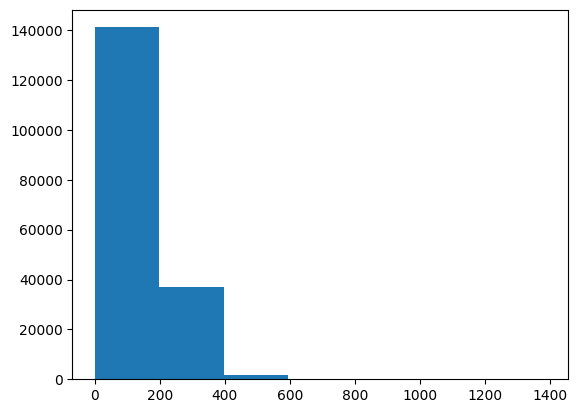

In [ ]:
#Check the distribution of our sequences at a character_level
import matplotlib.pyplot as plt
plt.hist(char_lens,bins=7)

In [ ]:
#Find what character length covers 95% of sequence
output_seq=int(np.percentile(char_lens,95))
output_seq

290

In [ ]:
#max_tokens will be the lowercase letters+digits+punctuation
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tokens=len(alphabet)+2# 2 for space and OOV
char_vectorizer=TextVectorization(max_tokens=tokens,
                               output_sequence_length=output_seq,
                               name="char_vectorizer")#here standartization will be defaultly change all into lowercase and remove all the punctuations

In [ ]:
char_vectorizer.adapt(train_chars)


In [ ]:
char_vocab=char_vectorizer.get_vocabulary()
print(char_vocab[:10]),# 10 most common characters
len(char_vocab)

['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']


28

In [ ]:
random_train_chars=random.choice(train_chars)
print(f"random_chars: {random_train_chars}\n")
print(f"length_of_random_chars: {len(random_train_chars.split())}\n")
print(f"Vectorized chars: {char_vectorizer([random_train_chars])}\n")
print(f"length_of_random_chars: {len(char_vectorizer([random_train_chars])[0])}\n")

random_chars: w e   a r e   a l s o   i n v e s t i g a t i n g   w h e t h e r   t h e   s t r u c t u r e   o f   t h e   p h y s i o t h e r a p y   p r o v i s i o n   i t s e l f   i n f l u e n c e s   o u t c o m e s   .

length_of_random_chars: 93

Vectorized chars: [[20  2  5  8  2  5 12  9  7  4  6 21  2  9  3  4 18  5  3  4  6 18 20 13
   2  3 13  2  8  3 13  2  9  3  8 16 11  3 16  8  2  7 17  3 13  2 14 13
  19  9  4  7  3 13  2  8  5 14 19 14  8  7 21  4  9  4  7  6  4  3  9  2
  12 17  4  6 17 12 16  2  6 11  2  9  7 16  3 11  7 15  2  9  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

#character level embedding

In [ ]:
char_embed=layers.Embedding(input_dim=len(char_vocab),
                            output_dim=25,
                            mask_zero=True,
                            name="char_embed")

In [ ]:
print(f"Charified_text:{random_train_chars}")
print(f"Embedded:{char_embed(char_vectorizer([random_train_chars]))}")

Charified_text:w e   a r e   a l s o   i n v e s t i g a t i n g   w h e t h e r   t h e   s t r u c t u r e   o f   t h e   p h y s i o t h e r a p y   p r o v i s i o n   i t s e l f   i n f l u e n c e s   o u t c o m e s   .
Embedded:[[[ 0.01632274  0.01235267 -0.02161546 ...  0.03286323 -0.01234934
   -0.02871164]
  [-0.03954202 -0.02611189 -0.01156102 ...  0.01933886 -0.01576153
    0.01877408]
  [ 0.03155208 -0.01995195  0.00602316 ...  0.03260652  0.04840529
   -0.03775633]
  ...
  [-0.01706984  0.04961335 -0.02764803 ...  0.00796896  0.02722473
    0.01267875]
  [-0.01706984  0.04961335 -0.02764803 ...  0.00796896  0.02722473
    0.01267875]
  [-0.01706984  0.04961335 -0.02764803 ...  0.00796896  0.02722473
    0.01267875]]]


In [ ]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs) # vectorize text inputs
char_embeddings = char_embed(char_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs,name="model_3")

In [ ]:
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

In [ ]:
#Turn our data into Tensorflow dataset
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_3.history=model_3.fit(train_char_dataset,
                            steps_per_epoch=int(0.1*len(train_char_dataset)),
                            epochs=3,
                            validation_data=val_char_dataset,
                            validation_steps=int(0.1*len(val_char_dataset))
                            )

Epoch 1/3
562/562 [==============================] - 9s 15ms/step - loss: 1.2718 - accuracy: 0.4869 - val_loss: 1.0478 - val_accuracy: 0.5808
Epoch 2/3
562/562 [==============================] - 9s 16ms/step - loss: 1.0090 - accuracy: 0.5989 - val_loss: 0.9469 - val_accuracy: 0.6230
Epoch 3/3
562/562 [==============================] - 9s 16ms/step - loss: 0.9353 - accuracy: 0.6363 - val_loss: 0.8800 - val_accuracy: 0.6576


In [ ]:
model_3_pred=model_3.predict(val_char_dataset)
model_3_pred

945/945 [==============================] - 4s 5ms/step


array([[0.15398335, 0.22820166, 0.10650654, 0.35027984, 0.16102861],
       [0.19685224, 0.67443365, 0.00511286, 0.07576822, 0.04783303],
       [0.18903631, 0.27297342, 0.11044825, 0.28583008, 0.14171186],
       ...,
       [0.00861639, 0.01810982, 0.10574891, 0.02233163, 0.84519327],
       [0.01837238, 0.08368042, 0.366049  , 0.03382461, 0.49807364],
       [0.31815207, 0.4889443 , 0.09777368, 0.086766  , 0.00836393]],
      dtype=float32)

In [ ]:
model_3_preds=tf.argmax(model_3_pred,axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 3, ..., 4, 4, 1])>

In [ ]:
model_3_results=calculate_results(yval,model_3_preds)
model_3_results

{'accuracy': 65.35151595392558,
 'precision': 0.6467316846960024,
 'recall': 0.6535151595392559,
 'f1': 0.6429895588712019}

#Model_4(token_embedding+char_embedding)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
token_inputs=layers.Input(shape=[],dtype=tf.string,name="token_input")
token_embeddings=embedding_layer(token_inputs)
token_output=layers.Dense(128,activation="relu")(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_output)


char_inputs=layers.Input(shape=(1,),dtype=tf.string,name="char_input")
char_vectors=char_vectorizer(char_inputs)
char_embedding=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embedding)
char_model=tf.keras.Model(char_inputs,char_bi_lstm)



token_char_concat=layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                char_model.output])


combined_dropout=layers.Dropout(0.5)(token_char_concat)
combined_dense=layers.Dense(128,activation="relu")(combined_dropout)
final_dropout=layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes,activation="softmax")(final_dropout)


model_4=tf.keras.Model(inputs=[token_model.input,char_model.input],
                       outputs=output_layer,
                       name="model_4_token_and_char_embeddings")

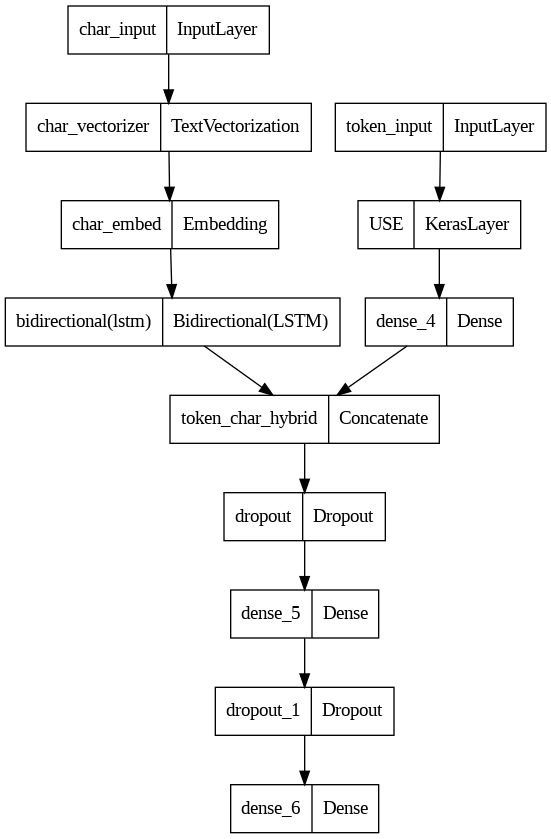

In [ ]:
from keras.utils import plot_model
plot_model(model_4)

In [ ]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"] )

#Combining token and character data into tf.data.Dataset


In [ ]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((Xtrain,train_chars))
train_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels)
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))#combine them
train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_char_token_data=tf.data.Dataset.from_tensor_slices((Xval,val_chars))
val_char_token_labels=tf.data.Dataset.from_tensor_slices(val_labels)
val_char_token_dataset=tf.data.Dataset.zip((val_char_token_data,val_char_token_labels))#combine them
val_char_token_dataset=val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
#check training char and token embedding dataset
train_char_token_dataset,val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

#Fitting a model on token and character_level sequences

In [ ]:
history_4=model_4.fit(train_char_token_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                            epochs=3,
                            validation_data=val_char_token_dataset,
                            validation_steps=int(0.1*len(val_char_token_dataset))
                            )

Epoch 1/3
562/562 [==============================] - 140s 233ms/step - loss: 0.9858 - accuracy: 0.6062 - val_loss: 0.7727 - val_accuracy: 0.7018
Epoch 2/3
562/562 [==============================] - 129s 230ms/step - loss: 0.8019 - accuracy: 0.6936 - val_loss: 0.7126 - val_accuracy: 0.7357
Epoch 3/3
562/562 [==============================] - 130s 231ms/step - loss: 0.7707 - accuracy: 0.7074 - val_loss: 0.6859 - val_accuracy: 0.7437


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 50s 52ms/step - loss: 0.6883 - accuracy: 0.7361


[0.688277006149292, 0.7360982298851013]

In [ ]:
model_4_pred_probs=model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 52s 51ms/step


array([[3.80167723e-01, 4.42394733e-01, 4.20839433e-03, 1.62133783e-01,
        1.10952696e-02],
       [2.95122802e-01, 5.03462911e-01, 2.65970151e-03, 1.96295887e-01,
        2.45874864e-03],
       [2.71536350e-01, 2.41569117e-01, 7.28436634e-02, 3.55557978e-01,
        5.84929734e-02],
       ...,
       [5.61734836e-04, 7.48613803e-03, 4.38962430e-02, 1.31882989e-04,
        9.47924018e-01],
       [4.53445036e-03, 4.95612733e-02, 2.08937541e-01, 2.28587352e-03,
        7.34680831e-01],
       [2.82642037e-01, 3.63996416e-01, 2.92469263e-01, 1.39959585e-02,
        4.68962938e-02]], dtype=float32)

In [ ]:
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [ ]:
model_4_results=calculate_results(yval,model_4_preds)
model_4_results

{'accuracy': 73.60982391102873,
 'precision': 0.7361584093980397,
 'recall': 0.7360982391102873,
 'f1': 0.7324562884829513}